## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
import pandas as pd

# Загрузка данных из CSV-файла (используем разделитель ;)
file_path = "german (1).csv"  # Убедитесь, что файл находится в той же папке, что и ноутбук
df = pd.read_csv(file_path, sep=';')

# Просмотр первых 5 строк для проверки структуры данных
df.head()


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
# Установка библиотеки scikit-learn (если не установлена)
!pip install scikit-learn

# Импорт необходимых модулей
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Загрузка данных
df = pd.read_csv("german (1).csv", sep=';')

# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

# Отделение признаков и целевой переменной
X = df.drop("Creditability", axis=1)
y = df["Creditability"]

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Пропущенные значения:
 Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Создание модели случайного леса с 100 деревьями
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на тренировочных данных
rf_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rf_model.predict(X_test)

# Вывод первых 5 предсказаний для проверки
print("Первые 5 предсказаний:", y_pred[:5])


Первые 5 предсказаний: [0 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Расчет точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность (accuracy):", accuracy)

# 2. Генерация подробного отчета по классификации
class_report = classification_report(y_test, y_pred)
print("\nОтчет о классификации:\n", class_report)

# 3. Матрица ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n", conf_matrix)


Точность (accuracy): 0.755

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.78      0.90      0.84       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

Матрица ошибок:
 [[ 27  35]
 [ 14 124]]


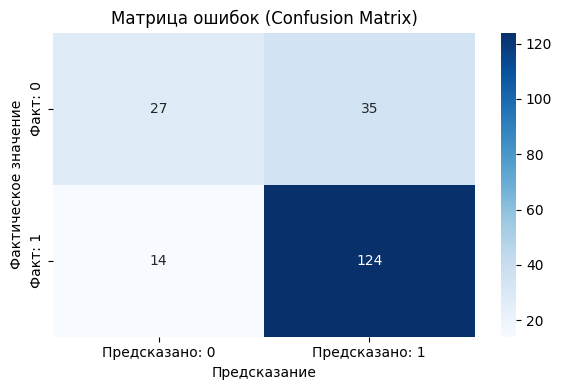

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация confusion matrix
plt.figure(figsize=(6, 4))  # Размер графика

# Построение тепловой карты
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Предсказано: 0", "Предсказано: 1"],
            yticklabels=["Факт: 0", "Факт: 1"])

# Названия и подписи
plt.title("Матрица ошибок (Confusion Matrix)")
plt.xlabel("Предсказание")
plt.ylabel("Фактическое значение")
plt.tight_layout()

# Показать график
plt.show()


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели